[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KedoKudo/DT_GNN_Tutorial/blob/tree/main/notebooks/01_intro_to_graphs.ipynb)

# Introduction to Graphs

In this notebook, we'll begin our exploration into the world of graph-based machine learning.
**Graphs**, often visualized as nodes (or vertices) connected by edges, represent a versatile data structure used in various applications, including

- physical networks: roads, power grids, water systems, etc.
- social networks: Facebook, Twitter, LinkedIn, etc.
- biological networks: protein-protein interactions, metabolic pathways, etc.
- knowledge graphs: Wikipedia, Freebase, etc.
- materials science: molecular structures, crystal lattices, etc.

## Table of Contents

1. What is a Graph and Graph Problem?
1. Conventional Graph Learning Techniques
1. Modern Graph Neural Networks (GNNs)
1. Differences between Conventional Techniques and GNNs

In [1]:
# When running in Colab, uncomment the following line
# !pip install networkx matplotlib scikit-learn python-igraph cairocffi

## 1. What is a Graph and Graph Problem?

A **graph** is a collection of nodes (or vertices) and edges connecting these nodes.
The nodes represent entities, and the edges represent relationships or interactions between these entities.
Depending on the relationship between the nodes, graphs can be either **directed** or **undirected**.

Graph Problems revolve around extracting useful information or patterns from these structures. Examples include but not limited to:

- **[Travelling Salesman Problem (TSP)](https://en.wikipedia.org/wiki/Travelling_salesman_problem)**: Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

- **[Maximum Flow Problem](https://en.wikipedia.org/wiki/Maximum_flow_problem)**: In a flow network, find a flow with maximum value.

- **[Graph Coloring](https://en.wikipedia.org/wiki/Graph_coloring)**: Assign colors to the vertices of a graph in such a way that no two adjacent vertices share the same color.

- **[Shortest Path Problem](https://en.wikipedia.org/wiki/Shortest_path_problem)**: Given a weighted graph (directed or undirected), find the shortest path from a starting point to a destination.

- **[Hamiltonian Path Problem](https://en.wikipedia.org/wiki/Hamiltonian_path_problem)**: Determine whether a given graph contains a Hamiltonian path (a path that visits each vertex exactly once).

- **[Minimum Spanning Tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree)**: Given a connected, undirected graph with weighted edges, find a spanning tree with the minimum possible total edge weight.

- **[Vertex Cover Problem](https://en.wikipedia.org/wiki/Vertex_cover)**: Find the smallest set of vertices such that every edge in the graph is incident to at least one vertex from this set.

In [2]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

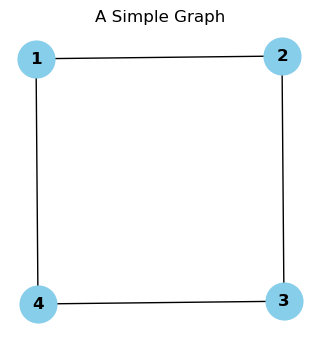

In [3]:
# Create a simple graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Draw the graph
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
plt.title("A Simple Graph")
plt.show()

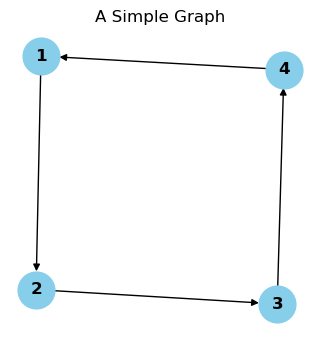

In [4]:
# Create a simple DIRECTED graph
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Draw the graph
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
plt.title("A Simple Graph")
plt.show()

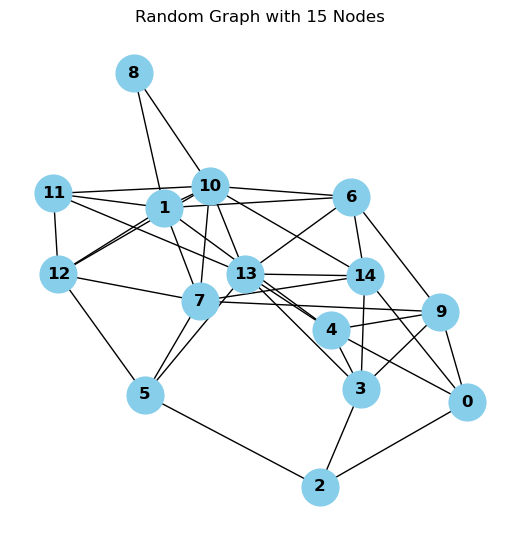

In [5]:
# Generate a random graph with 15 nodes and a probability of 0.3 for edge creation
G = nx.erdos_renyi_graph(15, 0.3)

# Draw the graph
plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
plt.title("Random Graph with 15 Nodes")
plt.show()

## 2. Conventional Graph Learning Techniques

Before the advent of graph neural networks, several techniques were already developed and widely used:

- Graph Traversal Algorithms: Methods like Breadth-First Search (BFS) and Depth-First Search (DFS) were used to explore and navigate graphs.

In [6]:
# Generate a random graph with 15 nodes and a probability of 0.3 for edge creation
G = nx.erdos_renyi_graph(15, 0.3)

# Breadth-First Search starting from node 1
list(nx.bfs_tree(G, source=1))

[1, 0, 2, 3, 5, 7, 4, 8, 12, 13, 6, 11, 10, 14, 9]

- Graph Theory Metrics: Centrality measures like
  - degree centrality: Measures the number of edges attached to a node.
  - betweenness centrality: Measures the number of times a node lies on the shortest path between other nodes. It quantifies the influence or control of a node over the flow of information in the graph.
  - eigenvector centrality: Rewards nodes with high-quality or influential neighbors. It is similar to Google's PageRank algorithm.

In [7]:
# Generate a random graph with 15 nodes and a probability of 0.3 for edge creation
G = nx.erdos_renyi_graph(15, 0.3)

# Measure Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for node, value in degree_centrality.items():
    print(f"Node {node}: {value:.4f}")

# Measure Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:")
for node, value in betweenness_centrality.items():
    print(f"Node {node}: {value:.4f}")

# Measure Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("\nEigenvector Centrality:")
for node, value in eigenvector_centrality.items():
    print(f"Node {node}: {value:.4f}")

Degree Centrality:
Node 0: 0.4286
Node 1: 0.2857
Node 2: 0.2857
Node 3: 0.2857
Node 4: 0.2857
Node 5: 0.1429
Node 6: 0.2143
Node 7: 0.5000
Node 8: 0.4286
Node 9: 0.2857
Node 10: 0.2857
Node 11: 0.2857
Node 12: 0.2857
Node 13: 0.5000
Node 14: 0.3571

Betweenness Centrality:
Node 0: 0.1074
Node 1: 0.0360
Node 2: 0.0990
Node 3: 0.0563
Node 4: 0.0586
Node 5: 0.0077
Node 6: 0.0228
Node 7: 0.1342
Node 8: 0.0729
Node 9: 0.0311
Node 10: 0.0610
Node 11: 0.0536
Node 12: 0.0129
Node 13: 0.1865
Node 14: 0.0601

Eigenvector Centrality:
Node 0: 0.3350
Node 1: 0.2110
Node 2: 0.2060
Node 3: 0.1988
Node 4: 0.1950
Node 5: 0.0807
Node 6: 0.1439
Node 7: 0.4046
Node 8: 0.3724
Node 9: 0.1889
Node 10: 0.1756
Node 11: 0.2081
Node 12: 0.2607
Node 13: 0.3524
Node 14: 0.3030


- Clustering Algorithms: Techniques such as spectral clustering used graph Laplacians to group similar nodes together.

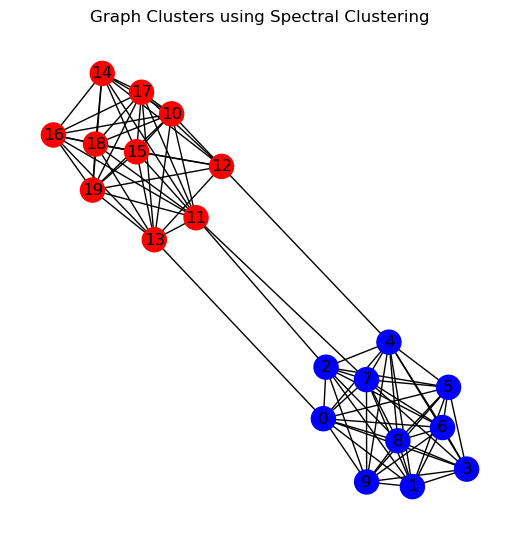

In [8]:
from sklearn.cluster import SpectralClustering

# Create a graph with two communities
G = nx.relaxed_caveman_graph(2, 10, 0.1)

# Convert to adjacency matrix in numpy format
adj_matrix = nx.to_numpy_array(G)

# Perform spectral clustering
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
clusters = sc.fit_predict(adj_matrix)

# Draw the graph
colors = ['red' if cluster == 0 else 'blue' for cluster in clusters]
plt.figure(figsize=(5,5))
nx.draw(G, node_color=colors, with_labels=True)
plt.title("Graph Clusters using Spectral Clustering")
plt.show()

- Matrix Factorization: Graphs were often represented as matrices (e.g., adjacency matrices), and techniques like Singular Value Decomposition (SVD) were applied for tasks like node embedding. The following example is using an naive approach to embed nodes in a graph, and in practice, more sophisticated techniques like **DeepWalk**, **node2vec**, etc., are often used for node embedding which also utilize random walks to capture the structural and neighborhood information of nodes.

Graph Nodes:
[(0, {'club': 'Mr. Hi'}), (1, {'club': 'Mr. Hi'}), (2, {'club': 'Mr. Hi'}), (3, {'club': 'Mr. Hi'}), (4, {'club': 'Mr. Hi'}), (5, {'club': 'Mr. Hi'}), (6, {'club': 'Mr. Hi'}), (7, {'club': 'Mr. Hi'}), (8, {'club': 'Mr. Hi'}), (9, {'club': 'Officer'}), (10, {'club': 'Mr. Hi'}), (11, {'club': 'Mr. Hi'}), (12, {'club': 'Mr. Hi'}), (13, {'club': 'Mr. Hi'}), (14, {'club': 'Officer'}), (15, {'club': 'Officer'}), (16, {'club': 'Mr. Hi'}), (17, {'club': 'Mr. Hi'}), (18, {'club': 'Officer'}), (19, {'club': 'Mr. Hi'}), (20, {'club': 'Officer'}), (21, {'club': 'Mr. Hi'}), (22, {'club': 'Officer'}), (23, {'club': 'Officer'}), (24, {'club': 'Officer'}), (25, {'club': 'Officer'}), (26, {'club': 'Officer'}), (27, {'club': 'Officer'}), (28, {'club': 'Officer'}), (29, {'club': 'Officer'}), (30, {'club': 'Officer'}), (31, {'club': 'Officer'}), (32, {'club': 'Officer'}), (33, {'club': 'Officer'})]

Graph Edges:
[(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'we

Text(0.5, 1.0, 'Karate Club Graph')

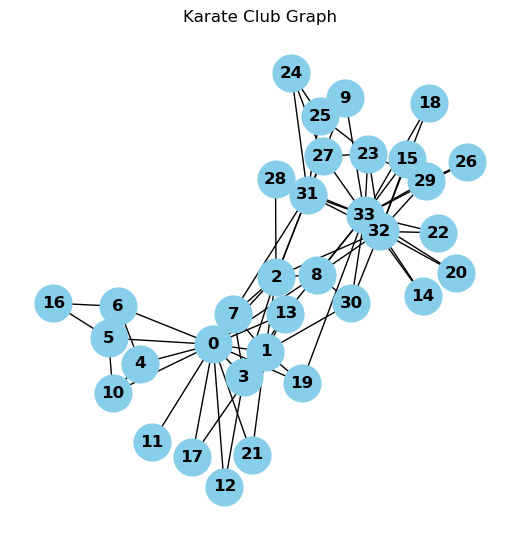

In [9]:
import numpy as np

# Create a small graph
G = nx.karate_club_graph()

# Check the graph and its attributes
print("Graph Nodes:")
print(G.nodes(data=True))
print("\nGraph Edges:")
print(G.edges(data=True))

# Plot the graph
plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
plt.title("Karate Club Graph")

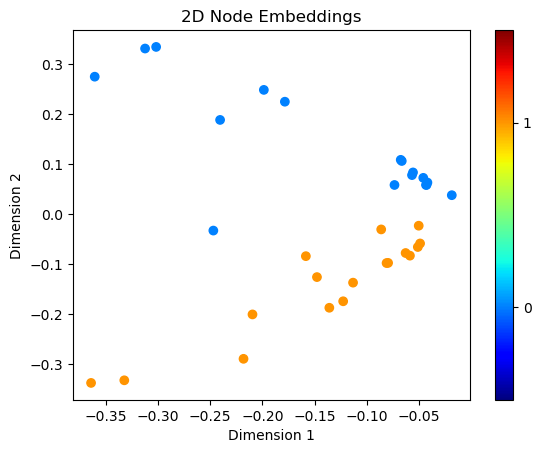

In [10]:
# Get the adjacency matrix
A = nx.to_numpy_array(G)

# SVD factorization
U, sigma, Vt = np.linalg.svd(A)

# For a 2-dimensional embedding
k = 2
embeddings = U[:, :k]

# Mapping club names to numbers
club_mapping = {club: idx for idx, club in enumerate(np.unique(list(nx.get_node_attributes(G, 'club').values())))}
colors = [club_mapping[club] for club in nx.get_node_attributes(G, 'club').values()]

# Plot 2D embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=colors, cmap='jet')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Node Embeddings')
plt.colorbar(ticks=range(len(club_mapping)))
plt.clim(-0.5, len(club_mapping)-0.5)
plt.show()

- Random Walks: Random walks, and their variations, were used for tasks like community detection or generating node embeddings.

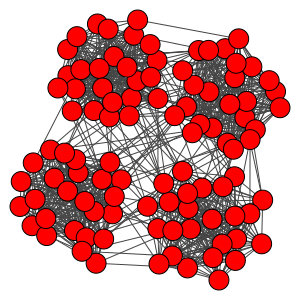

In [11]:
# Use Walktrap algorithm to detect communities
import igraph as ig

# Create a graph with clearer community structure
vertices_per_community = [25] * 4
edges_between_communities = [(i, j) for i in range(4) for j in range(i+1, 4)]
G = ig.Graph.SBM(n=sum(vertices_per_community), pref_matrix=[[0.8 if i == j else 0.02 for j in range(4)] for i in range(4)], block_sizes=vertices_per_community, directed=False, loops=False)

# View the graph
ig.plot(G, bbox=(0, 0, 300, 300))


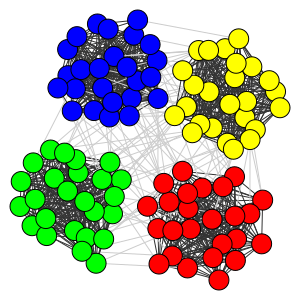

In [12]:
# Apply the Walktrap algorithm
community = G.community_walktrap(steps=3)
clusters = community.as_clustering()

# Visualization
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan', 'pink', 'brown', 'grey', 'orange']
plot_colors = [colors[x] for x in clusters.membership]
ig.plot(clusters, vertex_color=plot_colors, bbox=(0, 0, 300, 300))

It is worth pointing out that most of these conventional techniques can be used in conjunction with graph neural networks to expand GNN's capabilities and improve its performance.

## 3. Modern Graph Neural Networks (GNNs)

### Modern Graph Neural Networks

#### Foundation of GNNs

Graph Neural Networks (GNNs) have revolutionized the field of graph representation learning.
The foundation paper that introduced the Graph Neural Network model is:

- Scarselli, Franco, et al. "The graph neural network model." IEEE Transactions on Neural Networks 20.1 (2009): 61-80. You can access the paper [here](https://ieeexplore.ieee.org/document/4700287).

This paper proposed a framework to extend existing neural network methods to process data structured as graphs.
The model is particularly effective for cases where the data is represented in the form of a graph, and nodes have to be processed in an order that is not predefined, which allows the network to focus on the local neighborhood of each node.

#### Internal Working

The core idea behind GNNs is to update the representation of a node based on its neighbors' representations. This process is iterative, where each iteration updates node representations based on the latest representations of their neighbors. Once this iterative process converges or after a set number of iterations, the node representations are used for the task at hand, be it node classification, link prediction, or graph classification.

In a simple GNN model, the node representation updating can be formulated as:

$ h_{v}^{(t+1)} = \sigma\left(W \cdot \text{AGGREGATE}\left(\{h_{u}^{(t)}: u \in \text{Neighbors}(v)\}\right) + b \right) $

Here:
- $ h_{v}^{(t+1)} $ is the representation of node $v$ at iteration $t+1$.
- $\sigma$ is an activation function (e.g., ReLU).
- $W$ is a weight matrix.
- $\text{AGGREGATE}$ is an aggregation function that combines the features of neighboring nodes (e.g., sum, mean).

Using Numpy to demonstrate how weights are updated:

A=
[[0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


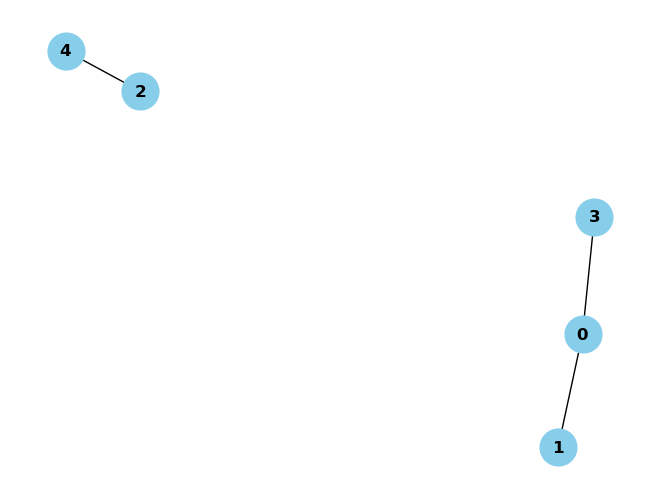

In [13]:
# Number of nodes, features, and hidden dimension
num_nodes = 5
num_features = 3
hidden_dim = 4

# Mock node features and weight matrix
features = np.random.rand(num_nodes, num_features)
W = np.random.rand(num_features, hidden_dim)
b = np.random.rand(hidden_dim)

# Generate a random graph with 5 nodes and a probability of 0.3 for edge creation
G = nx.erdos_renyi_graph(5, 0.3)

# View the graph
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')

# Get the adjacency matrix
adjacency = nx.to_numpy_array(G)
print(f"A=\n{adjacency}")

# Compute node representations for one iteration
def aggregate(features, adjacency):
    # For this simple example, aggregation is just summing up neighbor features
    return np.dot(adjacency, features)

new_features = np.dot(aggregate(features, adjacency), W) + b
activated_features = np.maximum(0, new_features)  # ReLU activation

In [14]:
# initial random weights
print(f"Initial weights:\n{W}")

Initial weights:
[[0.50554563 0.22962259 0.14594099 0.10108407]
 [0.7751505  0.45712745 0.46319794 0.65432917]
 [0.52150572 0.13773268 0.61429742 0.97199361]]


For backpropagation, the chain rule is applied as in traditional neural networks.
The gradients are propagated through the graph structure, updating weights based on the loss gradient.

Here's a simple demonstration using Numpy, considering Mean Squared Error (MSE) loss:

In [15]:
# Mock true labels and predicted labels
true_labels = np.random.rand(num_nodes, hidden_dim)
predicted_labels = activated_features

# MSE loss
loss = np.mean((true_labels - predicted_labels) ** 2)

# Gradients w.r.t. output (ReLU derivative and MSE derivative)
d_output = 2 * (predicted_labels - true_labels) * (predicted_labels > 0)

# Gradients w.r.t. weight matrix
dW = np.dot(aggregate(features, adjacency).T, d_output)

# Update weights using simple gradient descent
learning_rate = 0.01
W -= learning_rate * dW

print(f"New W=\n{W}")

New W=
[[0.47842701 0.1944718  0.13572616 0.07115429]
 [0.7487402  0.42319126 0.44939457 0.62180611]
 [0.49030823 0.0980349  0.60246528 0.93382793]]


This is a highly simplified version of the internal workings of GNNs, but it gives an idea of the iterative updating process and backpropagation through the graph structure. 
Modern GNNs, such as GraphSAGE, GCN, and GAT, have built upon and extended these ideas with more sophisticated aggregation functions and attention mechanisms.
In most cases, developers can leverage existing GNN libraries such as [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) and [Deep Graph Library (DGL)](https://www.dgl.ai/) to implement these models.
In this tutorial series, we'll be focusing on **PyTorch Geometric** and its extension, **PyTorch Geometric Temporal**.

## 4. Differences between Conventional Techniques and GNNs

- Representation Learning: Traditional techniques often relied on handcrafted features or matrix-based representations. GNNs learn node and graph representations directly from data, capturing complex patterns.
- Adaptive: GNNs can adapt and improve their performance with more data, whereas conventional methods have a fixed performance ceiling.
- End-to-end Learning: GNNs support end-to-end learning, where the entire model can be trained for a specific task. Traditional methods often involved multi-step processes.
- Generalization: GNNs can generalize to different graph structures and sizes, provided they're trained on diverse data.